
# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
this data set contins informations abpout 10000  movies collected from the movies database(tmdb)
 
 ### questions  we will answer 
which year had higher vote_average?

what is the relation between popularity and revenue?

what are top directors gettin vote_avr?

top popular movies ?

movies with highest profits ?

relation between runtime and popularity 




In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [66]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01  4% |█▋                              | 522kB 21.1MB/s eta 0:00:01    17% |█████▌                          | 1.8MB 26.2MB/s eta 0:00:01    29% |█████████▍                      | 3.1MB 26.2MB/s eta 0:00:01    40% |█████████████                   | 4.2MB 25.8MB/s eta 0:00:01    78% |█████████████████████████▎      | 8.3MB 30.0MB/s eta 0:00:01    92% |█████████████████████████████▊  | 9.7MB 31.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   19% |██████▏                         | 2.6MB 20.9MB/s eta 0:00:01    56% |██████████████████▏             | 7.6MB 24.1MB/s eta 0:00:01    66% |█████████████████████▏          | 8.9MB 27.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pan

<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 




In [111]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [112]:
#number of sampels and columns
df.shape

(10866, 21)

In [113]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


there is a 0 runtime value 
and same at budget
because it doesn't make sense that a movie with a 0$ budget

In [114]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [115]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [116]:
df.duplicated().sum()


1

In [117]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [118]:
# first we drop duplicates
df.drop_duplicates(inplace= True)


In [119]:
#let's make sure
df.duplicated().sum()



0

In [120]:
#droping some runtime and budget  values 
df.drop(df.query('runtime==0').index,inplace= True)
df.drop(df.query('budget==0').index,inplace= True)


In [121]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5166.000000,5166.000000,5.166000e+03,5.166000e+03,5166.000000,5166.000000,5166.000000,5166.000000,5.166000e+03,5.166000e+03
mean,45474.077816,0.992825,3.075525e+07,8.033763e+07,107.158343,408.873790,6.033101,2001.247774,3.690807e+07,1.022546e+08
std,72673.353003,1.329525,3.891025e+07,1.595211e+08,22.670118,788.489366,0.883426,11.778406,4.196569e+07,1.959608e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,8839.250000,0.348024,6.000000e+06,0.000000e+00,93.000000,36.000000,5.500000,1996.000000,8.103886e+06,0.000000e+00
50%,12960.000000,0.624960,1.700000e+07,2.101034e+07,103.000000,122.000000,6.100000,2005.000000,2.273559e+07,2.872138e+07
75%,44935.250000,1.152807,4.000000e+07,8.950402e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.134411e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [122]:
#droping columns that we will not use at our invistigation 

df.drop(['id','imdb_id','homepage','budget_adj','revenue_adj','keywords','tagline', 'overview'], axis=1, inplace=True)


In [123]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [124]:
#droping null values
df.dropna(how= 'any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 10865
Data columns (total 13 columns):
popularity              5020 non-null float64
budget                  5020 non-null int64
revenue                 5020 non-null int64
original_title          5020 non-null object
cast                    5020 non-null object
director                5020 non-null object
runtime                 5020 non-null int64
genres                  5020 non-null object
production_companies    5020 non-null object
release_date            5020 non-null object
vote_count              5020 non-null int64
vote_average            5020 non-null float64
release_year            5020 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 549.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis








## which year had higher vote_average?


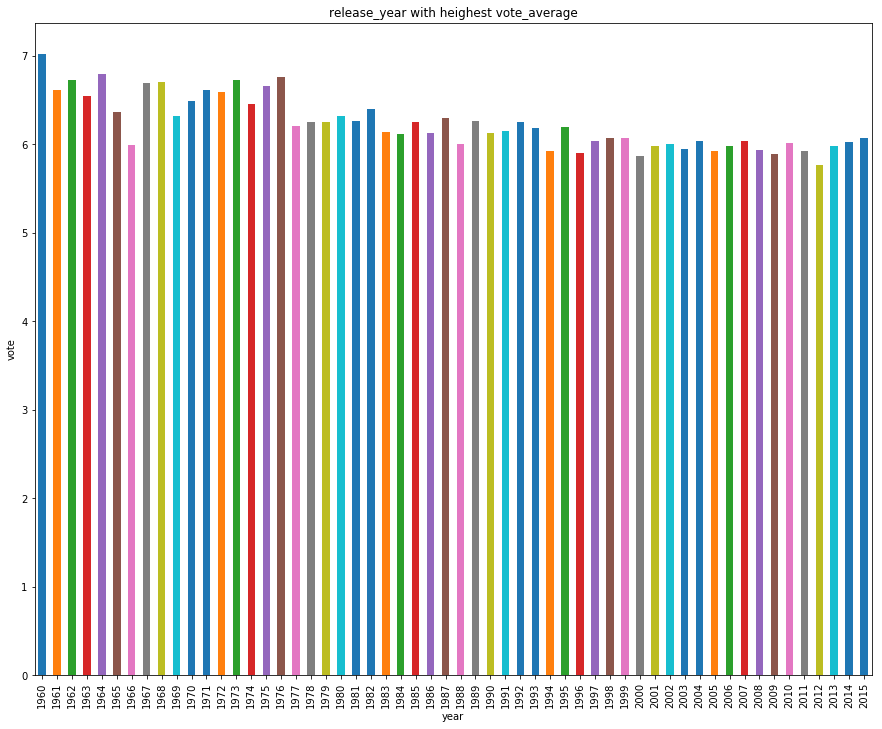

In [125]:
df.groupby('release_year')['vote_average'].mean().plot(kind='bar',figsize=(15,12));
plt.title('release_year with heighest vote_average')
plt.xlabel('year')
plt.ylabel('vote');

1960 is the highest avr rating 
and ratings are decreased over the years

##  correlation between revenue and popularity


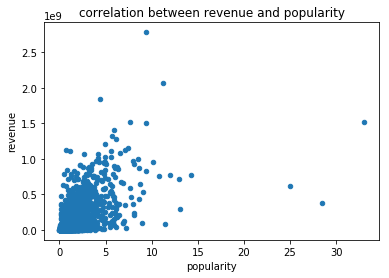

In [126]:
df.plot(kind='scatter', x='popularity',y='revenue');
plt.legend()
plt.title('correlation between revenue and popularity')
plt.xlabel('popularity')
plt.ylabel('revenue');

there is a positive correlation

## best directors getting votes


In [127]:
best_dir= df.groupby('director')['vote_average'].mean().sort_values(ascending=False)
best_dir

director
Jorge RamÃ­rez SuÃ¡rez                                                          8.400000
Damien Chazelle                                                                 8.200000
Morten Tyldum                                                                   8.000000
Tony Kaye                                                                       8.000000
Lenny Abrahamson                                                                8.000000
Pete Docter                                                                     8.000000
Sergio Leone                                                                    7.900000
Ron Fricke                                                                      7.900000
Rajkumar Hirani                                                                 7.800000
Ashutosh Gowariker                                                              7.800000
Lucy Walker                                                                     7.800000
Jeremy Podes

In [128]:
top_10_directors= best_dir.head(10)
top_10_directors

director
Jorge RamÃ­rez SuÃ¡rez    8.4
Damien Chazelle           8.2
Morten Tyldum             8.0
Tony Kaye                 8.0
Lenny Abrahamson          8.0
Pete Docter               8.0
Sergio Leone              7.9
Ron Fricke                7.9
Rajkumar Hirani           7.8
Ashutosh Gowariker        7.8
Name: vote_average, dtype: float64

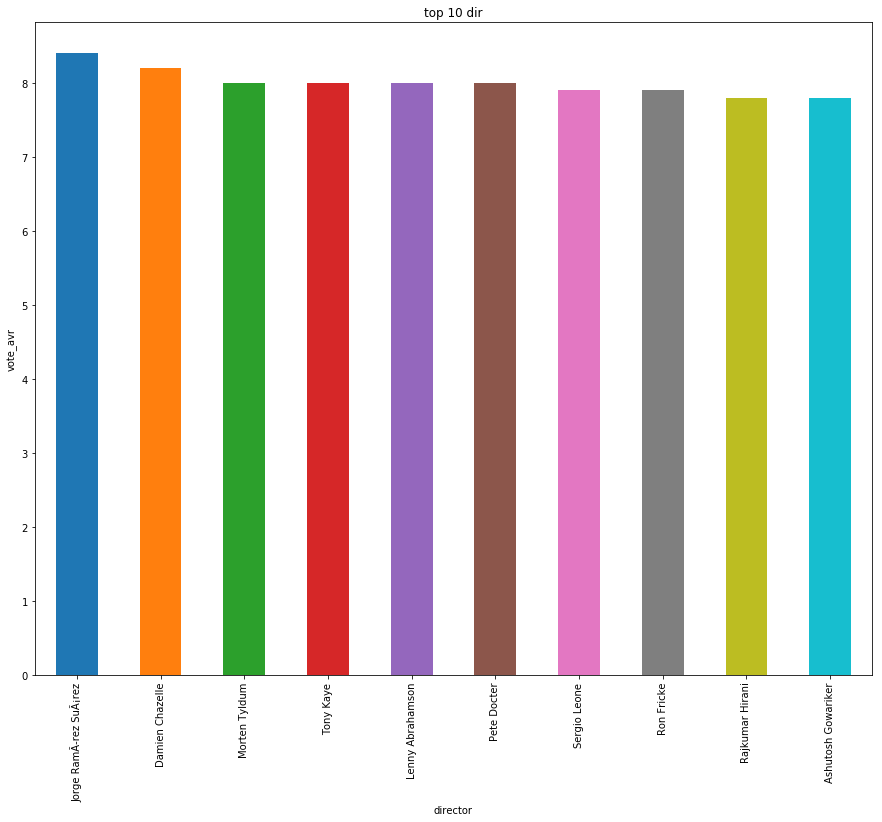

In [129]:
top_10_directors.plot(kind='bar', figsize=(15,12));
plt.title('top 10 dir')
plt.xlabel('director')
plt.ylabel('vote_avr');

'jorge ramarez' is the highest director with vote_average
this couldbe useful for some people who watches movies based on the director of the movie because they admire his work 
like 'nolan' or 'guy ritchie' which he is one of favourite directores

## movie with most popularity 



In [130]:
top_popular_mov=df.groupby('original_title')['popularity'].mean().sort_values(ascending=False)
top_popular_mov

original_title
Jurassic World                                                    32.985763
Mad Max: Fury Road                                                28.419936
Interstellar                                                      24.949134
Guardians of the Galaxy                                           14.311205
Insurgent                                                         13.112507
Captain America: The Winter Soldier                               12.971027
Star Wars                                                         12.037933
John Wick                                                         11.422751
Star Wars: The Force Awakens                                      11.173104
The Hunger Games: Mockingjay - Part 1                             10.739009
The Hobbit: The Battle of the Five Armies                         10.174599
Avatar                                                             9.432768
Inception                                                          9.3636

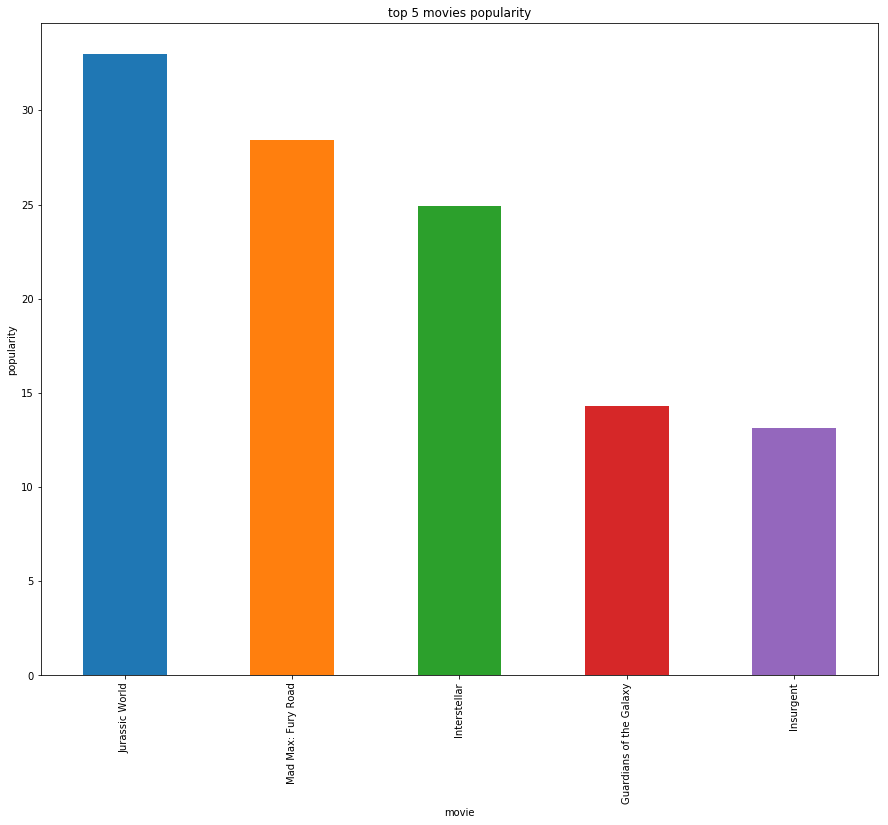

In [131]:
top_popular_mov.head().plot(kind='bar',figsize=(15,12));
plt.title('top 5 movies popularity')
plt.xlabel('movie')
plt.ylabel('popularity');

jurassic world is the most popular movie

## what is the highest movie profit 


In [132]:
df['profit'] = df['revenue'] -df["budget"]


In [133]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1316249360


In [134]:

top_prof=df.groupby('original_title')['profit'].mean().sort_values(ascending=False).head()

top_prof


original_title
Avatar                                          2.544506e+09
Star Wars: The Force Awakens                    1.868178e+09
Jurassic World                                  1.363529e+09
Furious 7                                       1.316249e+09
Harry Potter and the Deathly Hallows: Part 2    1.202818e+09
Name: profit, dtype: float64

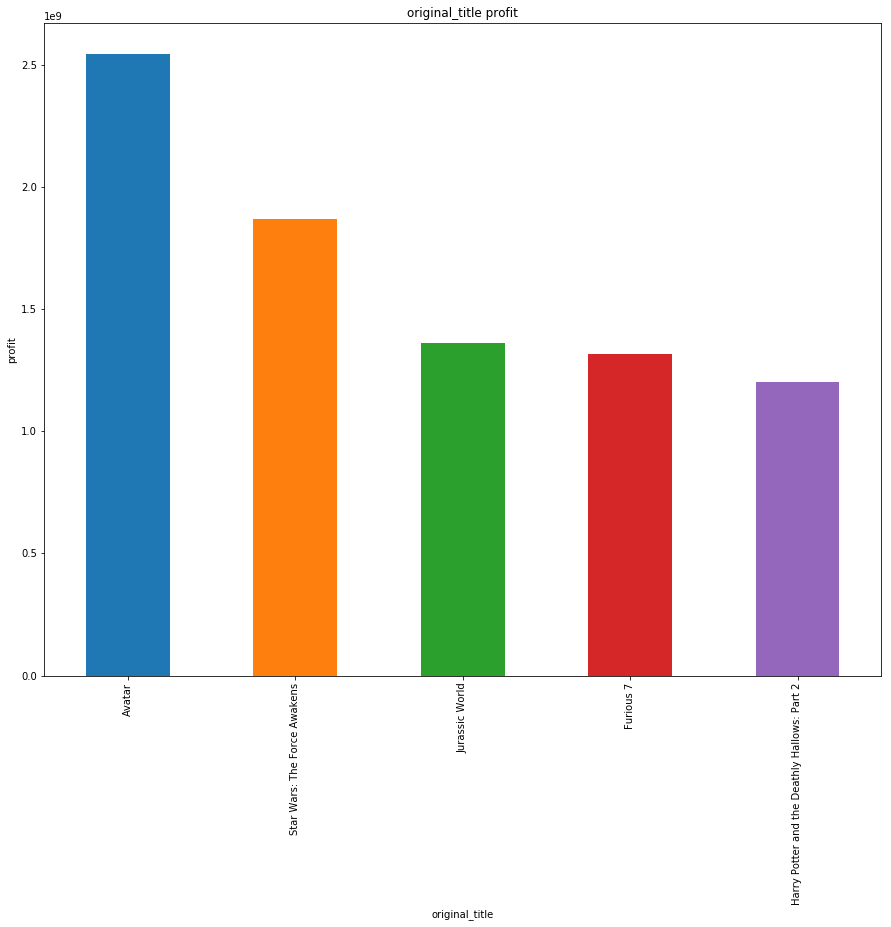

In [135]:
def name_var(df, x_axis, y_axis):
    df.groupby(x_axis)[y_axis].mean().sort_values(ascending=False).head().plot('bar',figsize=(15,12));
    plt.title(x_axis +' '+ y_axis)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
name_var(df,'original_title','profit')   

## relation between runtime and popularity 

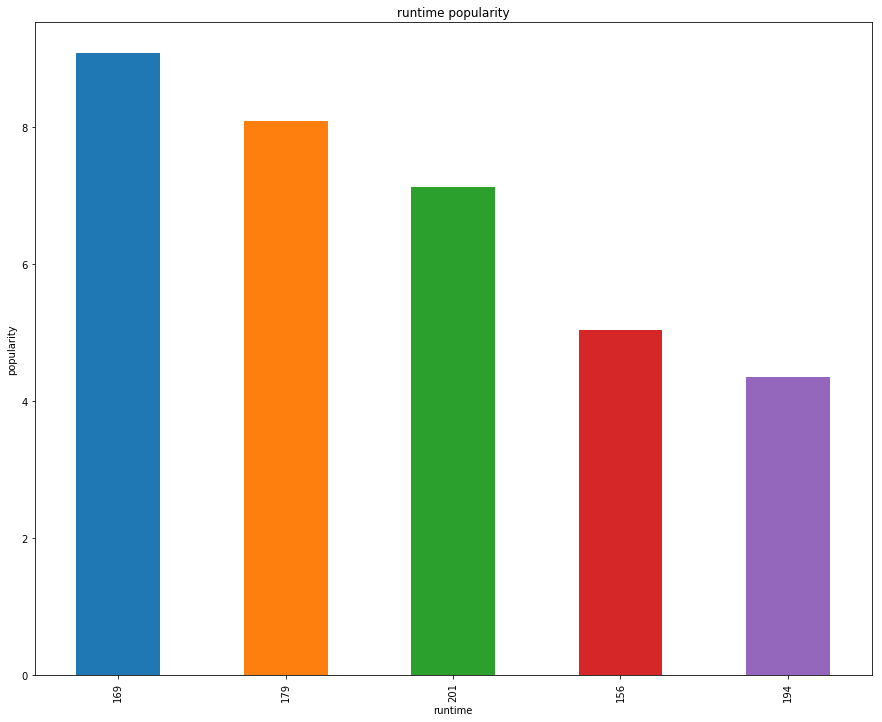

In [136]:
name_var(df,'runtime','popularity')

this is indistinct we find that movie with 201 value is not popular as movies with 169 and 194 values
and movies with 179 min value more popular than movies with 194 min runtime values

<a id='conclusions'></a>
## Conclusions
1960 is the highest year with vote_avr 
and ratings aredecresed till 2015 

there is a positive relation between popularity and revenue 

jorge ramarezis the highest director with average_vote

jurassic world is the most popular movie

avatar is the highest movie achieving profits 

 ## limitions 
there were some rows with non reasnobale values like a 0 values for a runtime movie also a movie budget with a 0$ so we droped them


having too many null values so we needed to drop them 

relation between runtime and popularity is insignificant


In [138]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0